In [4]:
import pandas as pd
import numpy as np

In [5]:
st=pd.read_csv("50_Startups.csv")

In [6]:
st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


Profit is dependent and others are the independent variable

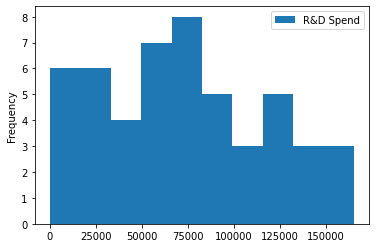

In [7]:
st.iloc[:,:1].plot.hist()

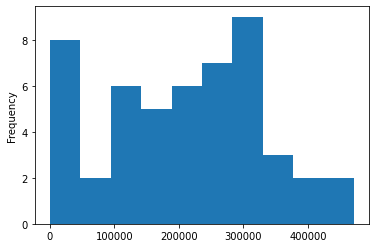

In [8]:
st.iloc[:,2].plot.hist()

In [9]:
import scipy.stats as stat

In [10]:
W,P=stat.shapiro(st.iloc[:,2])
print("shipiro :W:{0}   P{1}".format(W,P))

shipiro :W:0.9743662476539612   P0.3450772166252136


In [11]:
x=st.iloc[:,:-1].values
print(x)


[[165349.2 136897.8 471784.1 'New York']
 [162597.7 151377.59 443898.53 'California']
 [153441.51 101145.55 407934.54 'Florida']
 [144372.41 118671.85 383199.62 'New York']
 [142107.34 91391.77 366168.42 'Florida']
 [131876.9 99814.71 362861.36 'New York']
 [134615.46 147198.87 127716.82 'California']
 [130298.13 145530.06 323876.68 'Florida']
 [120542.52 148718.95 311613.29 'New York']
 [123334.88 108679.17 304981.62 'California']
 [101913.08 110594.11 229160.95 'Florida']
 [100671.96 91790.61 249744.55 'California']
 [93863.75 127320.38 249839.44 'Florida']
 [91992.39 135495.07 252664.93 'California']
 [119943.24 156547.42 256512.92 'Florida']
 [114523.61 122616.84 261776.23 'New York']
 [78013.11 121597.55 264346.06 'California']
 [94657.16 145077.58 282574.31 'New York']
 [91749.16 114175.79 294919.57 'Florida']
 [86419.7 153514.11 0.0 'New York']
 [76253.86 113867.3 298664.47 'California']
 [78389.47 153773.43 299737.29 'New York']
 [73994.56 122782.75 303319.26 'Florida']
 [67532

In [12]:
y=st.iloc[:,-1].values
print(y)# Profit

[192261.83 191792.06 191050.39 182901.99 166187.94 156991.12 156122.51
 155752.6  152211.77 149759.96 146121.95 144259.4  141585.52 134307.35
 132602.65 129917.04 126992.93 125370.37 124266.9  122776.86 118474.03
 111313.02 110352.25 108733.99 108552.04 107404.34 105733.54 105008.31
 103282.38 101004.64  99937.59  97483.56  97427.84  96778.92  96712.8
  96479.51  90708.19  89949.14  81229.06  81005.76  78239.91  77798.83
  71498.49  69758.98  65200.33  64926.08  49490.75  42559.73  35673.41
  14681.4 ]


In [13]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder



In [14]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')

In [15]:
import numpy as np

In [16]:
x=np.array(ct.fit_transform(x))
print(x)

[[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 0.0 1.0 144372.41 118671.85 383199.62]
 [0.0 1.0 0.0 142107.34 91391.77 366168.42]
 [0.0 0.0 1.0 131876.9 99814.71 362861.36]
 [1.0 0.0 0.0 134615.46 147198.87 127716.82]
 [0.0 1.0 0.0 130298.13 145530.06 323876.68]
 [0.0 0.0 1.0 120542.52 148718.95 311613.29]
 [1.0 0.0 0.0 123334.88 108679.17 304981.62]
 [0.0 1.0 0.0 101913.08 110594.11 229160.95]
 [1.0 0.0 0.0 100671.96 91790.61 249744.55]
 [0.0 1.0 0.0 93863.75 127320.38 249839.44]
 [1.0 0.0 0.0 91992.39 135495.07 252664.93]
 [0.0 1.0 0.0 119943.24 156547.42 256512.92]
 [0.0 0.0 1.0 114523.61 122616.84 261776.23]
 [1.0 0.0 0.0 78013.11 121597.55 264346.06]
 [0.0 0.0 1.0 94657.16 145077.58 282574.31]
 [0.0 1.0 0.0 91749.16 114175.79 294919.57]
 [0.0 0.0 1.0 86419.7 153514.11 0.0]
 [1.0 0.0 0.0 76253.86 113867.3 298664.47]
 [0.0 0.0 1.0 78389.47 153773.43 299737.29]
 [0.0 1.0 0.0 73994.56 122782.75 3

In [17]:
from sklearn.model_selection import train_test_split


In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [20]:
x_train,y_train

(array([[0.0, 1.0, 0.0, 55493.95, 103057.49, 214634.81],
        [0.0, 0.0, 1.0, 46014.02, 85047.44, 205517.64],
        [0.0, 1.0, 0.0, 75328.87, 144135.98, 134050.07],
        [1.0, 0.0, 0.0, 46426.07, 157693.92, 210797.67],
        [0.0, 1.0, 0.0, 91749.16, 114175.79, 294919.57],
        [0.0, 1.0, 0.0, 130298.13, 145530.06, 323876.68],
        [0.0, 1.0, 0.0, 119943.24, 156547.42, 256512.92],
        [0.0, 0.0, 1.0, 1000.23, 124153.04, 1903.93],
        [0.0, 0.0, 1.0, 542.05, 51743.15, 0.0],
        [0.0, 0.0, 1.0, 65605.48, 153032.06, 107138.38],
        [0.0, 0.0, 1.0, 114523.61, 122616.84, 261776.23],
        [0.0, 1.0, 0.0, 61994.48, 115641.28, 91131.24],
        [1.0, 0.0, 0.0, 63408.86, 129219.61, 46085.25],
        [1.0, 0.0, 0.0, 78013.11, 121597.55, 264346.06],
        [1.0, 0.0, 0.0, 23640.93, 96189.63, 148001.11],
        [1.0, 0.0, 0.0, 76253.86, 113867.3, 298664.47],
        [0.0, 0.0, 1.0, 15505.73, 127382.3, 35534.17],
        [0.0, 0.0, 1.0, 120542.52, 148718.95, 3

In [23]:
from sklearn.linear_model import LinearRegression

In [25]:
regressor=LinearRegression()


In [32]:
regressor.fit(x_train,y_train)

LinearRegression()

In [33]:
y_pred=regressor.predict(x_test)

In [30]:
y_pred

array([103015.20159795, 132582.27760816, 132447.73845175,  71976.09851258,
       178537.48221057, 116161.24230167,  67851.69209676,  98791.73374687,
       113969.43533014, 167921.06569552])

In [31]:
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[103015.2  103282.38]
 [132582.28 144259.4 ]
 [132447.74 146121.95]
 [ 71976.1   77798.83]
 [178537.48 191050.39]
 [116161.24 105008.31]
 [ 67851.69  81229.06]
 [ 98791.73  97483.56]
 [113969.44 110352.25]
 [167921.07 166187.94]]
